In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/feergm/Prediccion-de-ataque-cardiaco/main/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0.23
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0.37
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0.24
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0.28
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0.21


In [ ]:
# Renombrar los encabezados en español
df = df.rename(columns={
    'age': 'Edad',
    'sex': 'Sexo',
    'cp': 'Tipo_dolor_pecho',
    'trestbps': 'Presion_arterial_reposo',
    'chol': 'Colesterol_serico',
    'fbs': 'Azucar_sangre_ayunas',
    'restecg': 'Resultado_electrocardiografico_reposo',
    'thalach': 'Frecuencia_cardiaca_maxima',
    'exang': 'Angina_inducida_ejercicio',
    'oldpeak': 'Depresion_ST',
    'slope': 'Inclinacion_ST_ejercicio_pico',
    'ca': 'Vasos_principales_color_fluoroscopia',
    'thal': 'Talasemia',
    'target': 'Objetivo'
})

# Verificar los nuevos encabezados
df.head()

,Edad,Sexo,Tipo_dolor_pecho,Presion_arterial_reposo,Colesterol_serico,Azucar_sangre_ayunas,Resultado_electrocardiografico_reposo,Frecuencia_cardiaca_maxima,Angina_inducida_ejercicio,Depresion_ST,Inclinacion_ST_ejercicio_pico,Vasos_principales_color_fluoroscopia,Talasemia,Objetivo
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0.23
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0.37
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0.24
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0.28
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0.21


In [ ]:
#Promedio
df.mean()

Edad                                      54.434146
Sexo                                       0.695610
Tipo_dolor_pecho                           0.942439
Presion_arterial_reposo                  131.611707
Colesterol_serico                        246.000000
Azucar_sangre_ayunas                       0.149268
Resultado_electrocardiografico_reposo      0.529756
Frecuencia_cardiaca_maxima               149.114146
Angina_inducida_ejercicio                  0.336585
Depresion_ST                               1.071512
Inclinacion_ST_ejercicio_pico              1.385366
Vasos_principales_color_fluoroscopia       0.754146
Talasemia                                  2.323902
Objetivo                                   0.536390
dtype: float64

La edad promedio en nuestro dataset es de 54 años.


#Mediana
Obtendremos la mediana de algunas de nuestras variables.

In [ ]:
# Seleccionar solo las variables numéricas
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Calcular la mediana de cada variable numérica
medians = numeric_columns.median()

# Mostrar las medianas
print("Mediana de cada variable numérica:")
print(medians)


Mediana de cada variable numérica:
Edad                                      56.00
Sexo                                       1.00
Tipo_dolor_pecho                           1.00
Presion_arterial_reposo                  130.00
Colesterol_serico                        240.00
Azucar_sangre_ayunas                       0.00
Resultado_electrocardiografico_reposo      1.00
Frecuencia_cardiaca_maxima               152.00
Angina_inducida_ejercicio                  0.00
Depresion_ST                               0.80
Inclinacion_ST_ejercicio_pico              1.00
Vasos_principales_color_fluoroscopia       0.00
Talasemia                                  2.00
Objetivo                                   0.71
dtype: float64


#Boxplot

Los boxplots son una manera de visualizar la distribución de neustros datos usando percentiles.

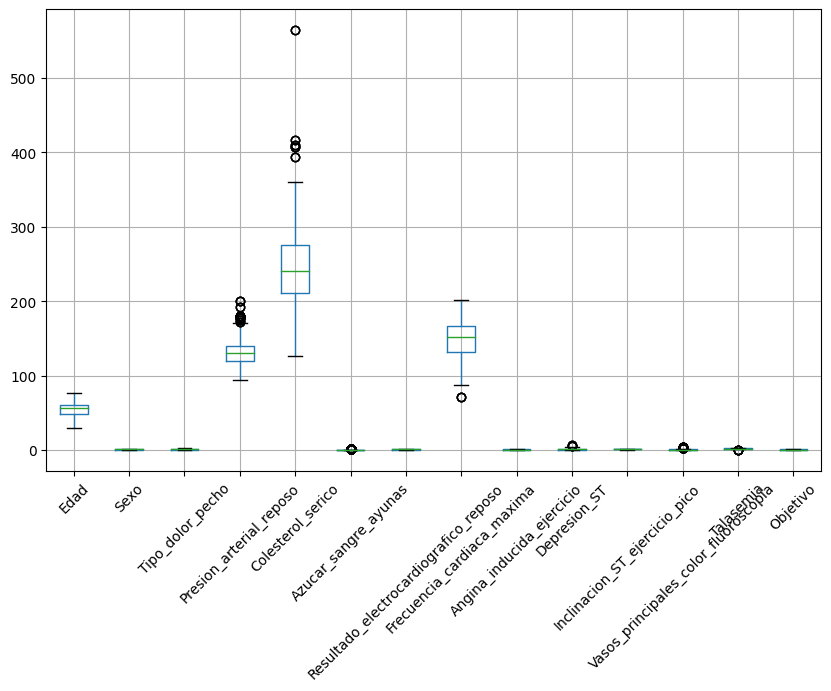

In [ ]:
# Graficar diagrama de cajas para variables numéricas
df.boxplot(figsize=(10, 6))
plt.xticks(rotation=45)
plt.show()


#Boxplots de cada variable y su rango intercuartílico

Para los boxplots solo usamos variables que tuvieran valores que no fueran solo 0 y 1. En este caso solo fueron las variables de Edad, Presion arterial, Colesterol serico, Frecuencia cardiaca y  Depresion ST. Las variables faltantes preferimos visualizarlas mediante histogramas.

Rango Intercuantílico: 13.00 años
Límite inferior de los bigotes: 28.5
Límite superior de los bigotes: 80.5


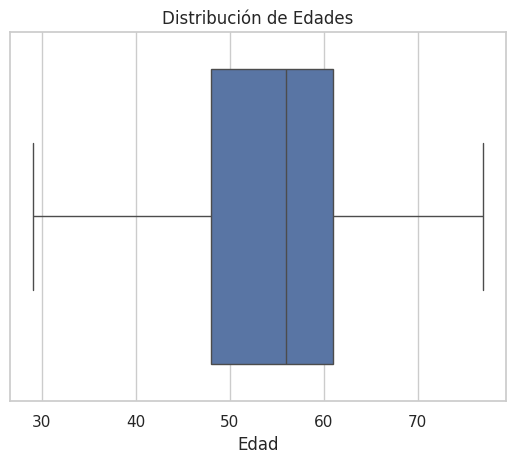

In [ ]:
sns.set(style='whitegrid')
sns.boxplot(x=df['Edad'])
plt.title('Distribución de Edades')

#Rango Intercuartílico
iqr_edad = df['Edad'].quantile(0.75) - df['Edad'].quantile(0.25)
print(f'Rango Intercuantílico: {iqr_edad:,.2f} años')

#Obtendremos el límite inferior y superior de nuestra variable Edad.
Q1 = df['Edad'].quantile(0.25)
Q3 = df['Edad'].quantile (0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - (1.5* IQR)
limite_superior = Q3 + (1.5 * IQR)

print('Límite inferior de los bigotes:', limite_inferior)
print('Límite superior de los bigotes:', limite_superior)

Rango Intercuantílico: 20.00 mm Hg
Límite inferior de los bigotes: 90.0
Límite superior de los bigotes: 170.0


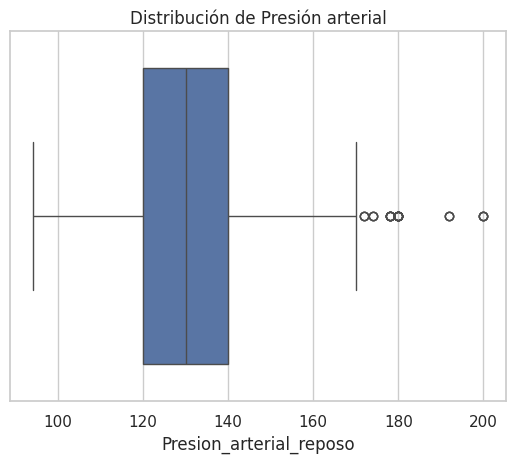

In [ ]:
sns.set(style='whitegrid')
sns.boxplot(x=df['Presion_arterial_reposo'])
plt.title('Distribución de Presión arterial')

#Rango Intercuartílico
iqr_P = df['Presion_arterial_reposo'].quantile(0.75) - df['Presion_arterial_reposo'].quantile(0.25)
print(f'Rango Intercuantílico: {iqr_P:,.2f} mm Hg')

#Obtendremos el límite inferior y superior de nuestra variable Edad.
Q1 = df['Presion_arterial_reposo'].quantile(0.25)
Q3 = df['Presion_arterial_reposo'].quantile (0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - (1.5* IQR)
limite_superior = Q3 + (1.5 * IQR)

print('Límite inferior de los bigotes:', limite_inferior)
print('Límite superior de los bigotes:', limite_superior)

Una presión arterial normal en personas adultas, se define como una presión sistólica de menos de 120 y una presión diastólica de menos de 80. La presión arterial elevada se considera como una presión sistólica entre 120 y 129 con una presión diastólica de menos de 80.

En el boxplot se puede observar la mediana con un valor de aproxiamdamente 130, siendo considerada como elevada. También se tienen valores atípicos, mostrando que hay pacientes con una presión arterial mayor a 170, por lo que son personas con una alta probabilidad de sufrir un paro cardíaco.

Las personas con valores mayores a 180 se dice que sufren una crisis hipertensiva, siendo una urgencia médica.

Rango Intercuantílico: 64.00 mg/dl
Límite inferior de los bigotes: 115.0
Límite superior de los bigotes: 371.0


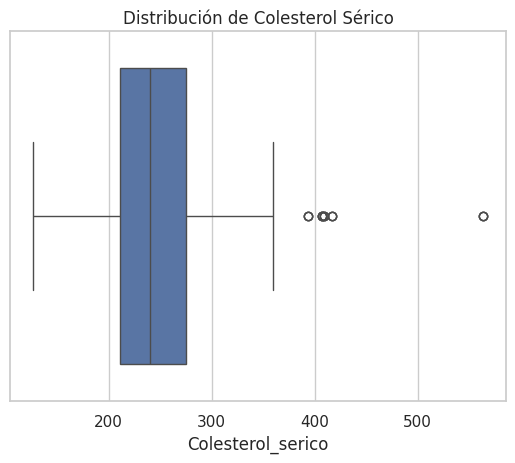

In [ ]:
sns.set(style='whitegrid')
sns.boxplot(x=df['Colesterol_serico'])
plt.title('Distribución de Colesterol Sérico')

#Rango Intercuartílico
iqr_c = df['Colesterol_serico'].quantile(0.75) - df['Colesterol_serico'].quantile(0.25)
print(f'Rango Intercuantílico: {iqr_c:,.2f} mg/dl')

#Obtendremos el límite inferior y superior de nuestra variable Edad.
Q1 = df['Colesterol_serico'].quantile(0.25)
Q3 = df['Colesterol_serico'].quantile (0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - (1.5* IQR)
limite_superior = Q3 + (1.5 * IQR)

print('Límite inferior de los bigotes:', limite_inferior)
print('Límite superior de los bigotes:', limite_superior)

El nivel de colesterol se recomienda que sea con un valor inferior a los 200 miligramos por decilitro (mg/dl). Entre 200 mg/dl  y los 239 mg/dl se considera elevado y es aconsejable reducirlo. De 240 mg/dl o más de colesterol, está elevado y es necesario reducirlo.

Cuadno el colesterol es muy alto, es posible que se formen depósitos grados en los vasos sanguíneos. Con el tiempo, estos depósitos crecen y hacen que sea más difícil que fluya suficiente sangre a través de las arterias. A veces, esos depósitos pueden romperse de repente y formar coágulos que causan un ataque cardíaco o un accidente cerebrovascular.

En el boxplot se puede observar que la mayoría de los pacientes tienen un colesterol elevado de 200. Además de tener valores atípicos que indian personas con un colesterol demasiado elevado, teniendo una mayor posibilidad de sufrir algún paro cardíaco.

Rango Intercuantílico: 34.00 latidos por minuto
Límite inferior de los bigotes: 81.0
Límite superior de los bigotes: 217.0


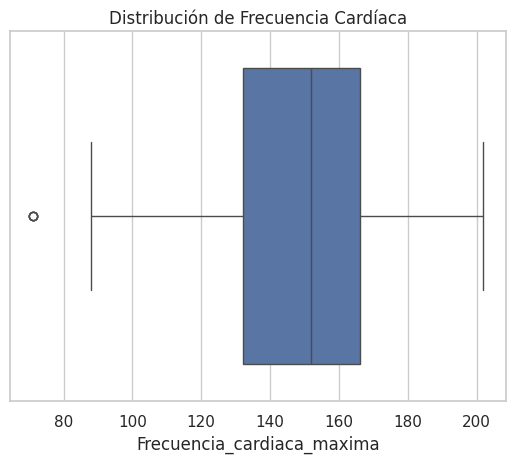

In [ ]:
sns.set(style='whitegrid')
sns.boxplot(x=df['Frecuencia_cardiaca_maxima'])
plt.title('Distribución de Frecuencia Cardíaca')

#Rango Intercuartílico
iqr_f = df['Frecuencia_cardiaca_maxima'].quantile(0.75) - df['Frecuencia_cardiaca_maxima'].quantile(0.25)
print(f'Rango Intercuantílico: {iqr_f:,.2f} latidos por minuto')

#Obtendremos el límite inferior y superior de nuestra variable Edad.
Q1 = df['Frecuencia_cardiaca_maxima'].quantile(0.25)
Q3 = df['Frecuencia_cardiaca_maxima'].quantile (0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - (1.5* IQR)
limite_superior = Q3 + (1.5 * IQR)

print('Límite inferior de los bigotes:', limite_inferior)
print('Límite superior de los bigotes:', limite_superior)

Una frecuencia cardíaca en reposo normal para los adultos oscila entre 60 y 100 latidos por minuto. En nuestro boxplot podemos observar que tenemos un valor atípico. Además de tener una asimetría negativa o sesgada a la izquierda, teniendo nuestra mediana en un valor de 152.

Rango Intercuantílico: 1.80 mm
Límite inferior de los bigotes: -2.7
Límite superior de los bigotes: 4.5


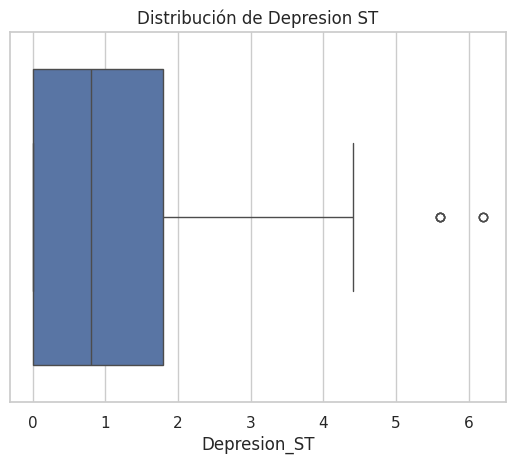

In [ ]:
sns.set(style='whitegrid')
sns.boxplot(x=df['Depresion_ST'])
plt.title('Distribución de Depresion ST')

#Rango Intercuartílico
iqr_d = df['Depresion_ST'].quantile(0.75) - df['Depresion_ST'].quantile(0.25)
print(f'Rango Intercuantílico: {iqr_d:,.2f} mm')

#Obtendremos el límite inferior y superior de nuestra variable Edad.
Q1 = df['Depresion_ST'].quantile(0.25)
Q3 = df['Depresion_ST'].quantile (0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - (1.5* IQR)
limite_superior = Q3 + (1.5 * IQR)

print('Límite inferior de los bigotes:', limite_inferior)
print('Límite superior de los bigotes:', limite_superior)

La depresión del segmento ST y la invesión de la onda T son alteraciones electrocardiográficas comunes. Conocer las diversas características morfológicas isquémicas y no isquémicas es fundamental para un diagnóstico oportuno de isquemia miocárdica y alteraciones relacionadas con electrolitos o fármacos

#Histogramas

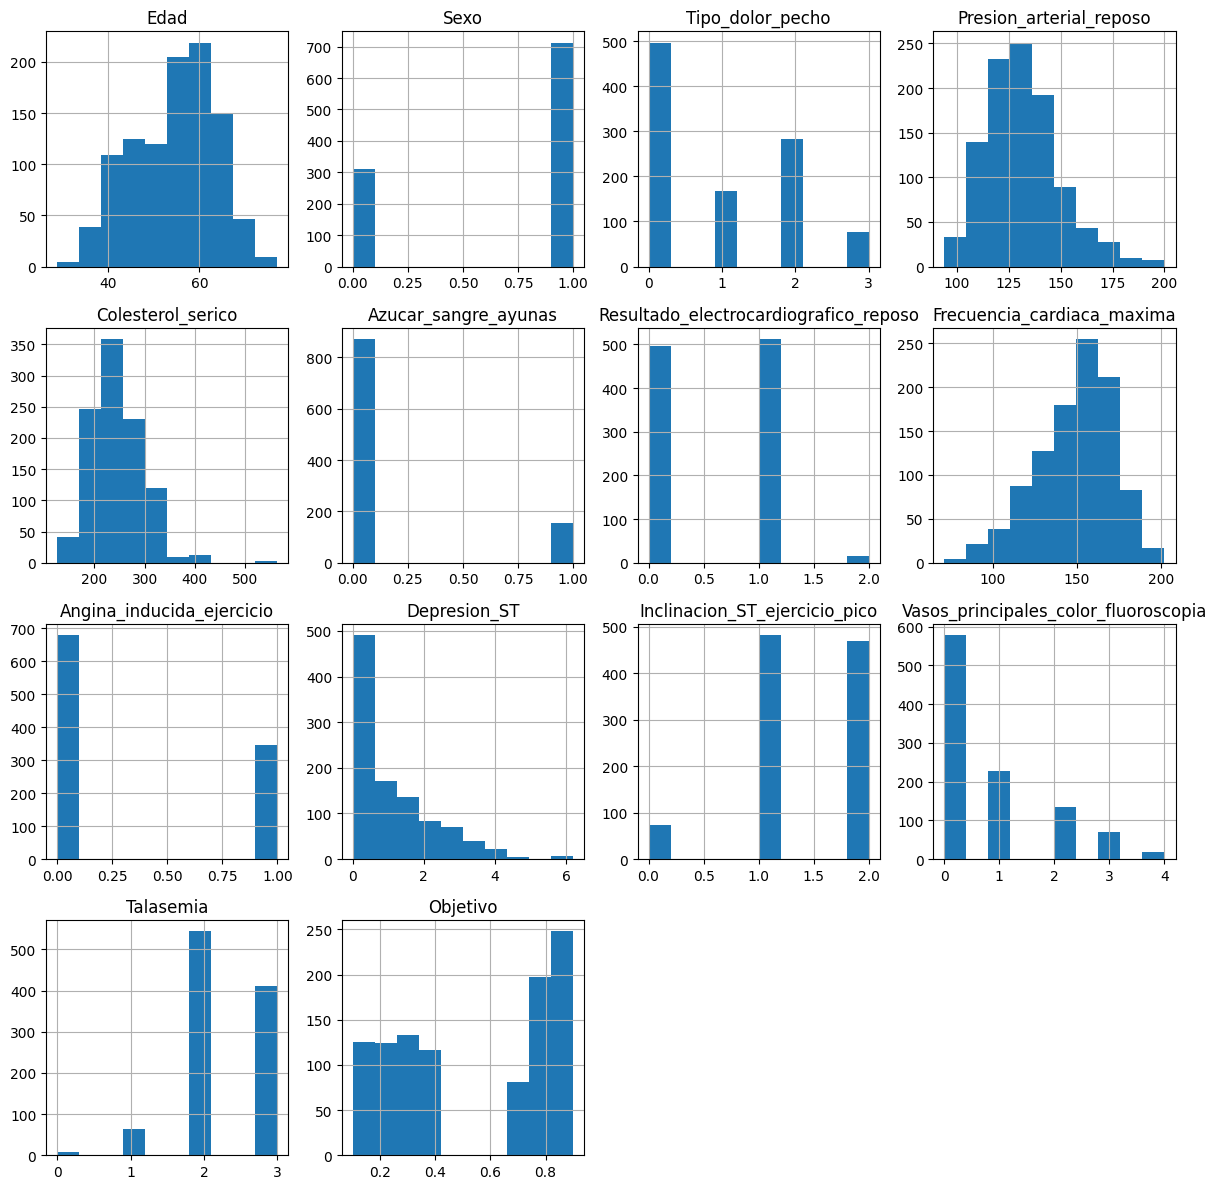

In [ ]:
# Graficar histogramas para variables numéricas
df.hist(figsize=(12, 12))
plt.tight_layout()
plt.show()

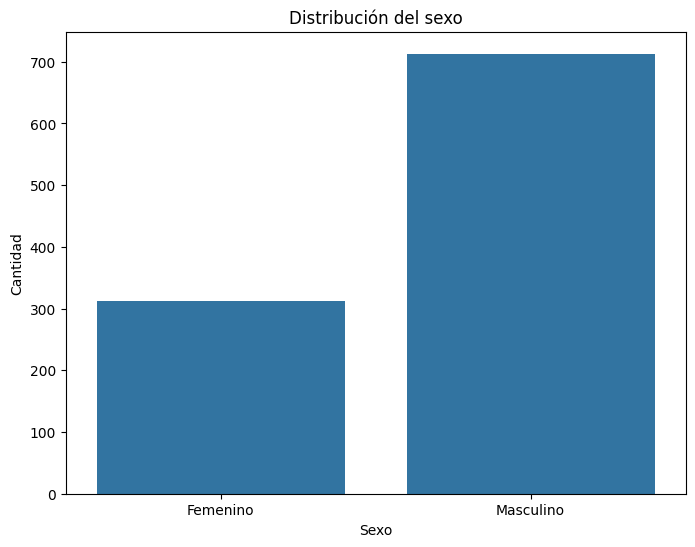

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sexo', hue_order=['Femenino', 'Masculino'])
plt.title('Distribución del sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['Femenino', 'Masculino'])
plt.show()

De acuerdo con el gráfico de distribución del sexo, observamos que hay una mayor cantidad de hombres que de mujeres.

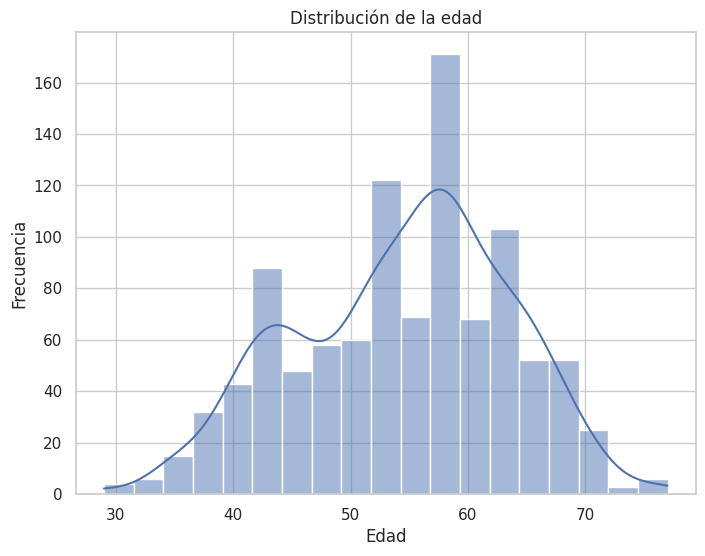

In [ ]:
# Histograma para la variable 'Edad'
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Edad', kde=True)
plt.title('Distribución de la edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


La mayoría de los pacientes tienen una edad entre 50 y 60 años, aunque también tenemos pacientes que son un poco mayores de 40 años y otros mayores de 60 años.

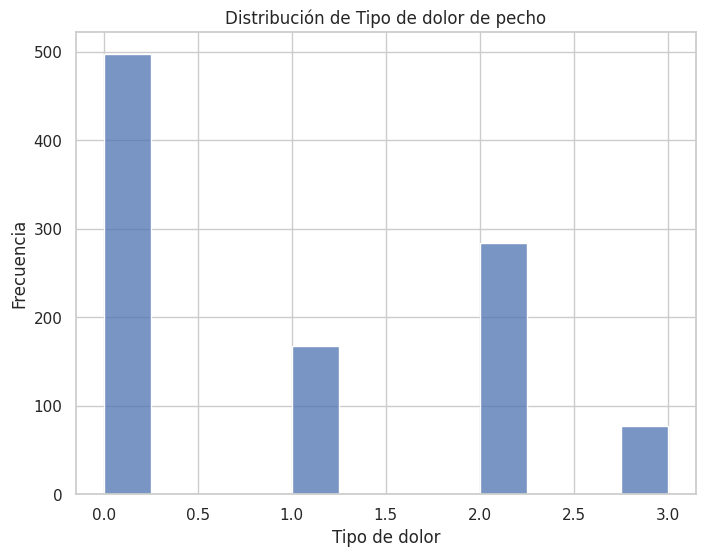

In [ ]:
# Histograma para la variable 'Tipo_dolor_pecho'
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Tipo_dolor_pecho', kde=False)
plt.title('Distribución de Tipo de dolor de pecho')
plt.xlabel('Tipo de dolor')
plt.ylabel('Frecuencia')
plt.show()

De acuerdo con el dataset a cada tipo de dolor se le asigno un valor:

* Angina Típica = 0
* Angina Atipica = 1
* Dolor no anginoso = 2
* Asintomático = 3

Con estos datos, podemos observar que la mayoría de los pacientes sufren un dolor de pecho anfina típica.

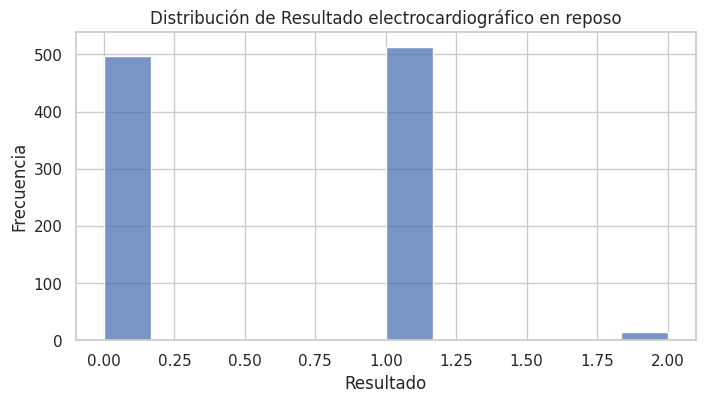

In [ ]:
# Histograma para la variable 'Resultado_electrocardiografico_reposo'
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Resultado_electrocardiografico_reposo', kde=False)
plt.title('Distribución de Resultado electrocardiográfico en reposo')
plt.xlabel('Resultado')
plt.ylabel('Frecuencia')
plt.show()

De acuerdo con el dataset, se dividen los resultados electrocardi en tres diferentes valores:
* Normal: 0
* Anormal: 1
* Hipertrófico: 2

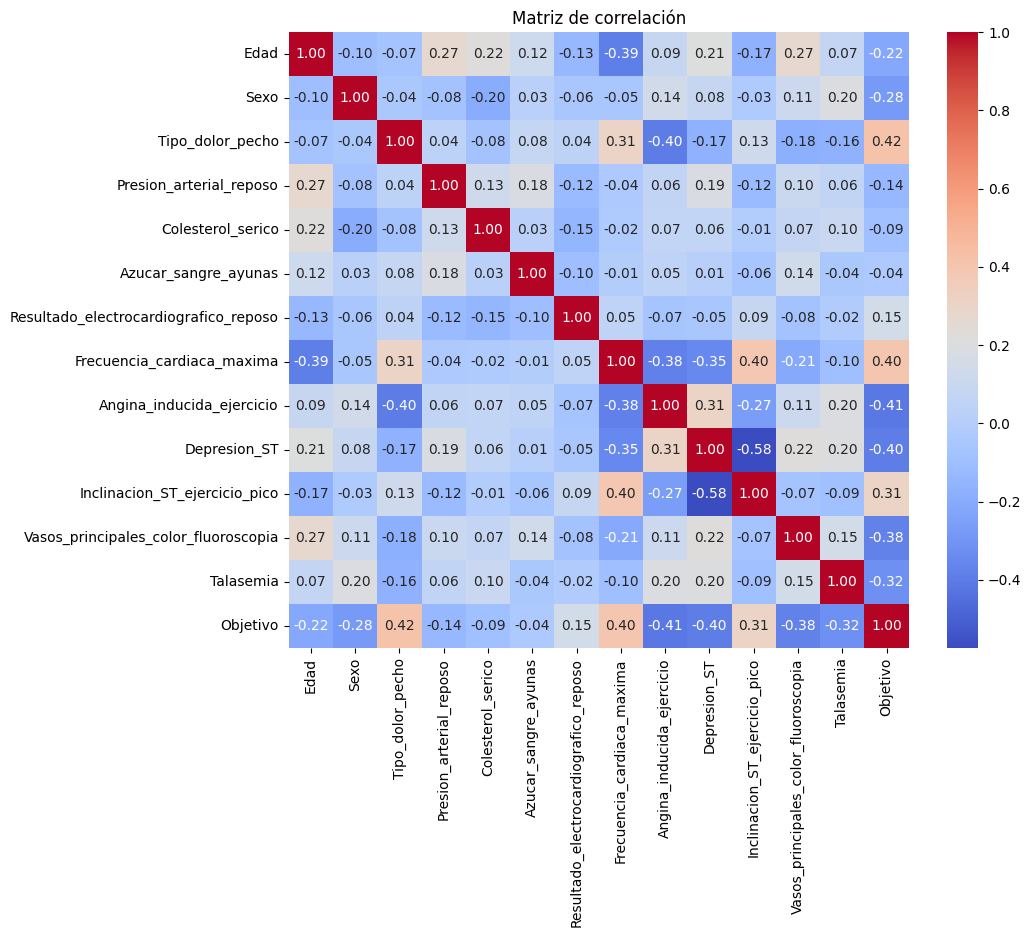

In [ ]:
# Calcular matriz de correlación
correlation_matrix = df.corr()

# Graficar matriz de correlación usando un mapa de calor (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()


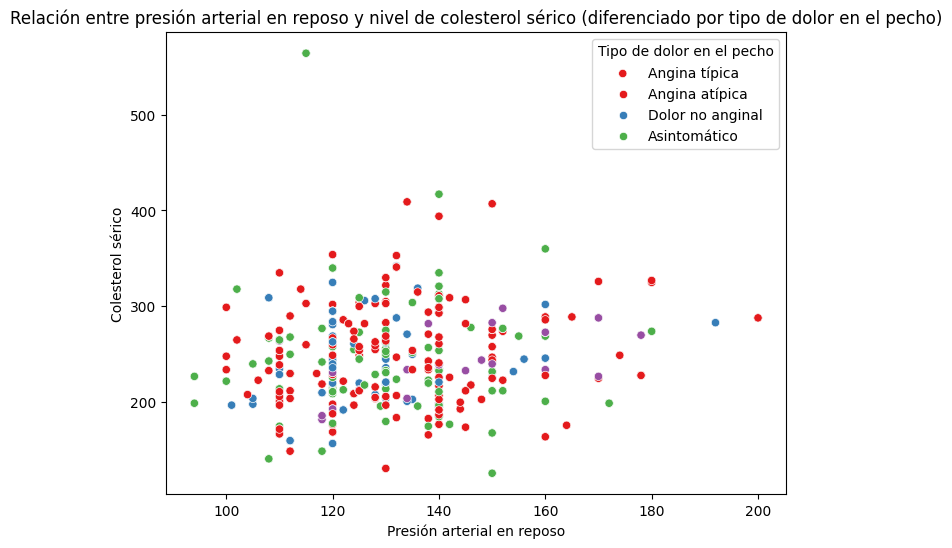

In [ ]:
tipo_dolor_pecho_dict = {
    0: 'Angina típica',
    1: 'Angina atípica',
    2: 'Dolor no anginal',
    3: 'Asintomático'
}
# Diagrama de dispersión entre 'trestbps' y 'chol' diferenciando por 'cp'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Presion_arterial_reposo', y='Colesterol_serico', hue='Tipo_dolor_pecho', palette='Set1')
plt.title('Relación entre presión arterial en reposo y nivel de colesterol sérico (diferenciado por tipo de dolor en el pecho)')
plt.xlabel('Presión arterial en reposo')
plt.ylabel('Colesterol sérico')

# Remplazar etiquetas del eje hue (tipo de dolor de pecho)
plt.legend(title='Tipo de dolor en el pecho', labels=[tipo_dolor_pecho_dict[i] for i in range(len(tipo_dolor_pecho_dict))])
plt.show()



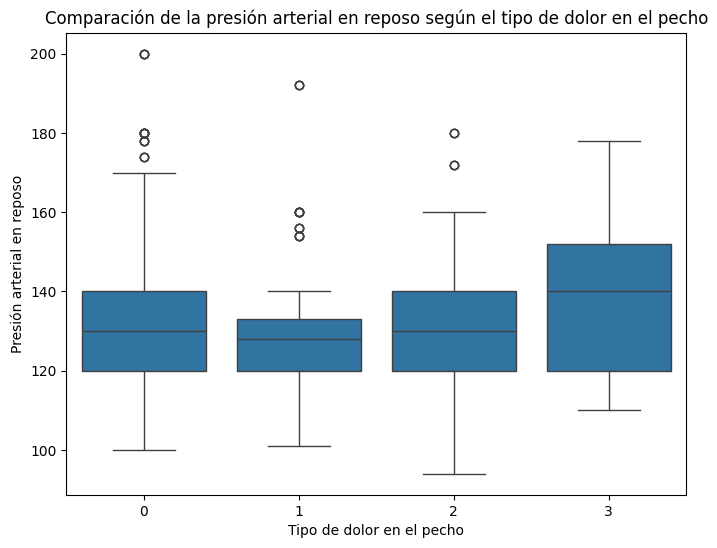

In [ ]:
# Comparación de la presión arterial en reposo entre pacientes con y sin angina de pecho
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='cp', y='trestbps')
plt.title('Comparación de la presión arterial en reposo según el tipo de dolor en el pecho')
plt.xlabel('Tipo de dolor en el pecho')
plt.ylabel('Presión arterial en reposo')
plt.show()


Error cuadrático medio (MSE): 74.37278958705
Coeficiente de determinación (R^2): 0.012591724581115571


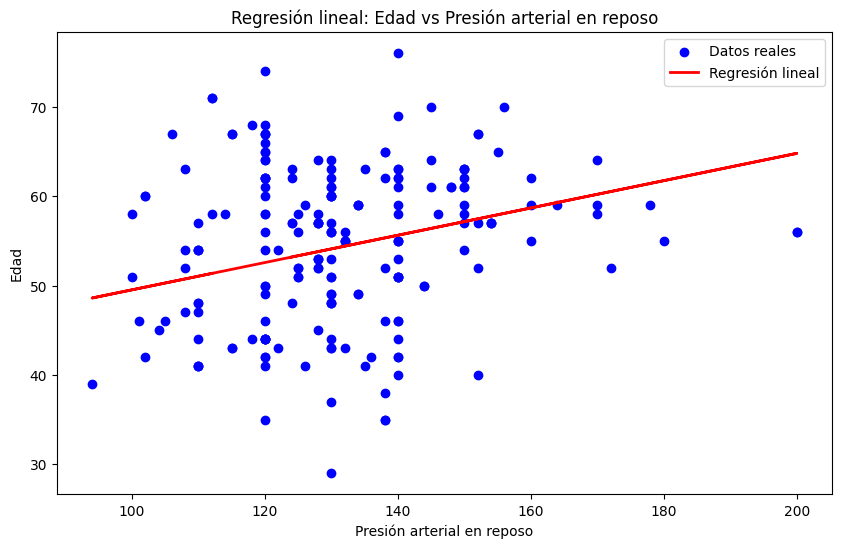

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Seleccionar las variables independiente (X) y dependiente (y)
X = df[['trestbps']]  # Variable independiente: presión arterial en reposo
y = df['age']         # Variable dependiente: edad

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas de evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regresión lineal')
plt.title('Regresión lineal: Edad vs Presión arterial en reposo')
plt.xlabel('Presión arterial en reposo')
plt.ylabel('Edad')
plt.legend()
plt.show()
